%%html
<style>
    .myblock {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
    }
    
    .exercise {
        background-color: #AFEEEE;
    }
    
    .theorem {
        background-color: #FEC4A3;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Continuous stochastic processes</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Homework 1</b></center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy import stats
from collections import Counter
from sklearn.neighbors import KernelDensity

import sys
sys.path.append('./imports')
import arrival_process_simulation as arrival

<div class="myblock exercise">
<h1>Exercise 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

A Poisson process with rate $\lambda$ can be defined as a counting process $\{N(t); t \ge0 \}$ with the following properties:
    
(a) $N(0) = 0$

(b) $N(t)$  has independent and stationary increments.
    
(c) Let $\Delta N(t) = N(t + \Delta t) - N(t)$ with $\Delta t \rightarrow 0^+$. The following relations hold:
    
$$
\begin{align}
    \mathbb P[\Delta N(t) = 0] & \; = 1 - \lambda \Delta t + o(\Delta t) \qquad & (1) \\ 
    \mathbb P[\Delta N(t) = 1] & \; = \lambda \Delta t + o(\Delta t) \qquad & (2) \\
    \mathbb P[\Delta N(t) \ge 2] & \; = o(\Delta t) \qquad & (3)
\end{align}
$$
    
<b>a)</b> From this definition show that

$$
    \mathbb P[N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t} \qquad (4) \\
$$  
     
<b>b)</b> Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theorical distribution of $\mathbb P[N(t) = n]$ given by the equation (4) for the values $\lambda=10$ and $t=2$.
</div>

### Solution to a)

We will prove equation (4) by an inductive procedure.

#### Case n=0:

From statement (c) we know that $N(t + \Delta t) = \Delta N(t) + N(t)$. Then:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = 0] & = \mathbb P[\Delta N(t) + N(t) = 0] \\ 
    & \stackrel{(*)}{=} \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = 0] \\
    & \stackrel{(1)}{=} \mathbb P[\Delta N(t) = 0] \;  (1 - \lambda \Delta t + o(\Delta t)) \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = 0] - \mathbb P[\Delta N(t) = 0] } {\Delta t} = - \lambda \mathbb P[\Delta N(t) = 0] + \frac{o(\Delta t)}{\Delta t} \mathbb P[\Delta N(t) = 0]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = 0] = - \lambda \mathbb P[\Delta N(t) = 0]
$$

This is a linear homogeneus diferential equation, which only solution that satifies the initial condition $\mathbb P[\Delta N(t) = 0] = 1$ is

$$
    \mathbb P[\Delta N(t) = 0] = e^{-\lambda t}
$$

#### Case n>0:

Let's prove the $n$-case with our induction hypothesis for $n-1$:

$$
    \mathbb P[N(t) = n-1] = \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \qquad (5) \\
$$  

We begin with the same development as in the base case, but for and arbitrary $n$:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = n] & = \mathbb P[\Delta N(t) + N(t) = n] \\ 
    & \stackrel{(*)}{=} \sum_{k=0}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & = \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = n] \\
    & + \mathbb P[\Delta N(t) = 1] \; \mathbb P[N(t) = n-1] \\
    & + \sum_{k=2}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & \stackrel{(1,2,3)}{=} (1 - \lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n] \\
    & + (\lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=2}^n \mathbb \; \mathbb P[N(t) = n-k] \\
    & = (1 - \lambda \Delta t ) \; \mathbb P[N(t) = n] + \lambda \Delta t \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k] \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = n] - \mathbb P[\Delta N(t) = n] } {\Delta t} = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg) + \frac{o(\Delta t)}{\Delta t} \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg)
$$

Using the induction hypothesis (6) we obtain our differential equation:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg)
$$

Let us rename our space variable in the previous equation understand it better. We are looking for a function $y(t)$ such that

$$
    \frac{\text d} {\text dt} y(t) = - \lambda \bigg( y(t) - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg) \qquad (6) \\
$$

This differential equation is not linear and, as such, we can solve it using separated variables as we did in the base case. We may use Picard-Lindelöf's Theorem to prove that the solution is unique, and then prove that (4) is a solution to the equation (6). Thus, proving that is the only solution.

<div class="myblock theorem">
<h1>Theorem (Picard Lindelöf's)</h1>

Consider the initial value problem

$$
    \frac{\text d} {\text dt} y(t) = f(t,y(t)), \qquad y(t_{0})=y_{0}.
$$
    
Suppose $f$ is uniformly Lipschitz continuous in $y$ (meaning the Lipschitz constant can be taken independent of $t$) and continuous in $t$, then there exists a unique solution $y(t)$ to the initial value problem.
</div>

Since our function $f(t,y(t))$ is continuous in $t$, we just need to prove that is uniformly Lipschitz continuous in $y$.

$$
    \frac{\text d} {\text dy} f(t,y(t)) = - \lambda \in \mathbb R
$$

Since the derivative with respect to $y$ of $f$ is constant, $f$ is uniformly Lipschitz continuous and our initial value problem given by teh equation (6) and the initial condition $\mathbb P[\Delta N(t) = n] = 0$ is unique.

We just need to prove that (4) is a solution to the differential equation (6). Let $x(t)$ be

$$
    x(t) \equiv \frac{1}{n!} \lambda^n t^n e^{-\lambda t}.
$$  

Then,

$$
\begin{align}
    \frac{\text d} {\text dt} x(t) & = \frac{-\lambda^{n+1} t^{n}}{n!} e^{-\lambda t} + \frac{\lambda^{n} t^{n-1}}{(n-1)!} e^{-\lambda t} \\ 
    & = -\lambda \bigg(\frac{-\lambda^{n} t^{n}}{n!} e^{\lambda t} - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg) \\
    & = -\lambda \bigg(x(t) - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg)
\end{align}
$$

Proving that $x(t)$ as defined in equation (4) is a solution to the differential equation.

### Solution to b)

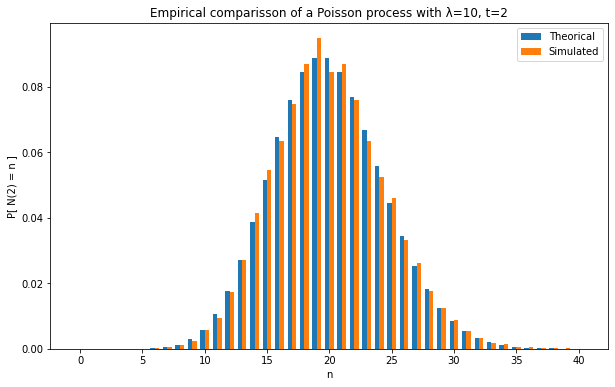

In [2]:
def exercise_1(t=2, max_n=40, lamb=10):
    # Theoretical
    ns = np.arange(max_n+1)*1.0
    y_theoretical = (lamb*t)**ns * np.exp(-lamb*t) / factorial(ns)

    # Simulation
    M = 10000
    counter = Counter([ len(arrival_times) for arrival_times in arrival.simulate_poisson(0, t, lamb, M)])
    total_count = sum(counter.values())
    y_simulated = [counter[i]/total_count for i in ns]

    # Plotting
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(ns - width/2, y_theoretical, width, label='Theorical')
    plt.bar(ns + width/2, y_simulated, width, label='Simulated')

    plt.xlabel('n')
    plt.ylabel('P[ N(2) = n ]')
    plt.title('Empirical comparisson of a Poisson process with λ=10, t=2')
    plt.legend()

exercise_1()

<div class="myblock exercise">
<h1>Exercise 2</h1> <a href='#Ejercicio-2' class='anchor-link'>¶</a>

Simulate a Poisson process with $\lambda = 5$. From these simulations show for different values of $n \in \{1,2,5,10\}$ that the probability density of the $n$-th arrival is

$$
    f_{S_n} (t) = \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$
</div>

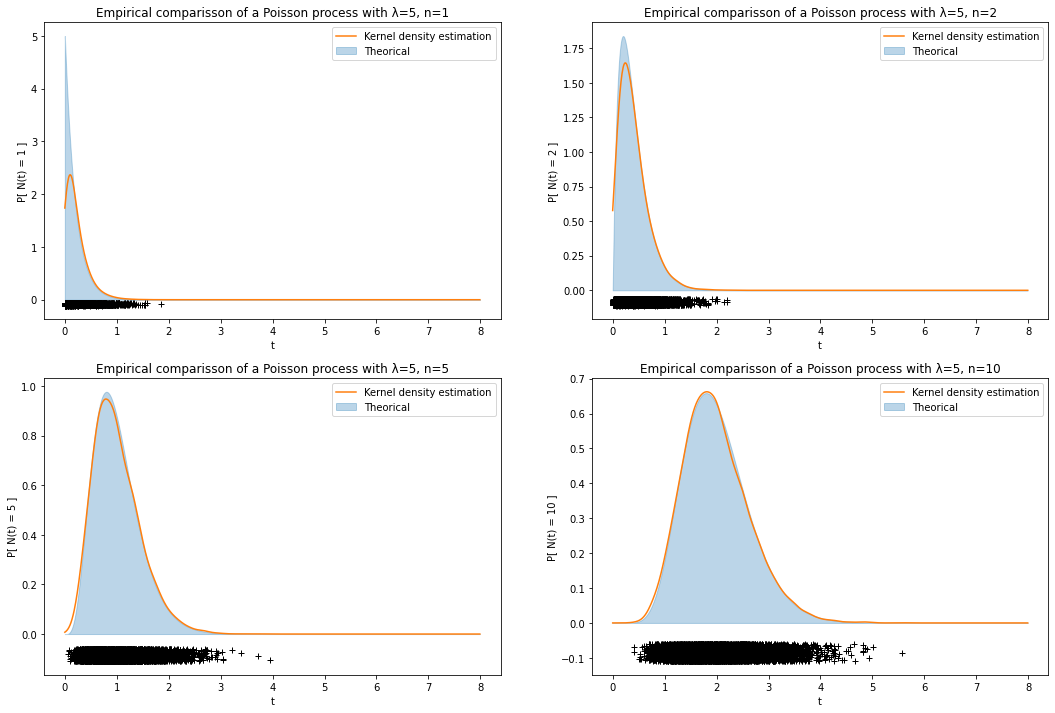

In [3]:
def plot_kde_in_axis(axis, ts, pdf, pdf_kde, samples, lamb, n):
    # Plot pdf and estimation
    axis.fill_between(ts, pdf, alpha=0.3, color='C0', label='Theorical')
    axis.plot(ts, pdf_kde, color='C1', label='Kernel density estimation')

    # Plot little x's near the X axis
    axis.plot(samples[:, 0], -0.06 - 0.05 * np.random.random(samples.shape[0]), "+k")

    axis.set_xlabel('t')
    axis.set_ylabel('P[ N(t) = {} ]'.format(n))
    axis.set_title('Empirical comparisson of a Poisson process with λ={}, n={}'.format(lamb, n))
    axis.legend()

def exercise_2(ns=[1,2,5,10], lamb=5, max_t=8, n_samples_kde=10**4, kde_bandwidth=0.1):
    ts = np.arange(max_t, step=0.01)
    _, axis = plt.subplots(2, 2, figsize=(18, 12))

    for ax, n in zip(axis.flatten(), ns):
        # Theorical
        sn_pdf = stats.erlang.pdf(ts, a=n, scale=1/lamb)

        # Kernel Density Estimation
        sn_empirical = [ arrival_times[n-1] for arrival_times in arrival.simulate_poisson(0, max_t, lamb, n_samples_kde)]
        sn_empirical = np.array(sn_empirical).reshape(-1, 1)
        kernel_density_estimatior = KernelDensity(kernel='gaussian', bandwidth=kde_bandwidth).fit(sn_empirical)
        sn_pdf_estimation = np.exp(kernel_density_estimatior.score_samples(np.array(ts).reshape(-1, 1)))

        # Plotting
        plot_kde_in_axis(ax, ts, sn_pdf, sn_pdf_estimation, sn_empirical, lamb, n)
    
exercise_2(kde_bandwidth=0.1)


<div class="myblock exercise">
<h1>Exercise 3</h1> <a href='#Ejercicio-3' class='anchor-link'>¶</a>
    
Asume that we have a sample $\{U_i\}_{i=1}^n$ of $n$ iid $U[0,t]$. The probability density of the order statistic $\{U_{(1)} < U_{(2)} < \dots < U_{(n)}\}$ is:
$$
f_{\{U_{(i)}\}_{i=1}^n} \left(\{u_{(i)}\}_{i=1}^n \right) = \frac{n!}{t^n}.
$$

Let $\{N(t); t \geq 0\}$ be a Poisson process with rate $\lambda$. Show that conditioned on $N(t) = n$, the distribution of arrival times $\{0 < S_1,\dots,S_n\}$ coincides with the distribution of order statistics of $n$ iid $U[0,t]$ random variables:
$$
f_{\{S_{(i)}\}_{i=1}^n|N(t)} \left(\{s_{(i)}\}_{i=1}^n | n \right) = \frac{n!}{t^n}.
$$

</div>

**Proof.-**

During this exercise, we will omit the subindex of the p.d.f. $f$ when it is clear from the context, since the argument of the function in each case is enough to determine it. 

Firstly, recall that the Bayes' theorem with p.d.f. of continuous random variables states:

<div class="myblock theorem">
Let $X,Y$ be continuous random variables. Then,

$$
f_{X|Y = y}(x) = \frac{f_{Y|X =x }(y) f_X(x)}{f_Y(y)}
$$

</div>

In our case, considering that :

- $X = \{\{S_{i}\}_{i=1}^{n+1}\}$
- $Y = N(t)$

We can apply the theorem to obtain:

$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} | N(t) = n \right) = 
\frac{f (n \; | \;  \{s_i\}_{i=1}^{n+1} \}) \ \ 
f\left( \{s_i\}_{i=1}^{n+1}\right)} 
{f(n)}.
$$

Now, recall that $N(t) = n$ if, and only if, $s_n \leq t < s_{n+1}$, we obtain
$$
f_{N(t) \; | \; \{s_i\}_{i=1}^{n+1}} (n \; | \;  \{s_i\}_{i=1}^{n+1} \}) = \begin{cases}
1 & s_n \leq t \leq s_{n+1}\\
0 & \text{otherwise}
\end{cases}
$$
From this point, we will consider that our $t$ is fixed in the interval $[s_n,s_{n+1}]$. Then,
$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} \; N(t) = n \right) = 
\frac{f\left( \{s_i\}_{i=1}^{n+1}\right)} {f(n)}.
$$

We also have to consider the fact that,
$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} \; | N(t) = n \right) = f(s_{n+1}|\{s_{(i)}\}_{i=1}^{n}, n) f(\{s_{(i)}\}_{i=1}^{n+1},n) \stackrel{(1)}{=} f(s_{n+1}|n) \; f(\{s_n\}_{i=0}^n \; | \;  n )
$$
where, in $(1)$ we have made use of the memoryless property. The last term that has appeared is the one that we want to find, so we express that equality now in a convenient way:

$$
f(\{s_n\}_{i=0}^n \; | \;  n ) = \frac{f\left(\{s_{(i)}\}_{i=1}^{n+1} \; | N(t) = n \right)}{f(s_{n+1}|n)}.
$$

And, now we can use the expression of the numerator that we found right above to obtain that:

$$
f(\{s_n\}_{i=0}^n \; | \;  n ) = \frac{\frac{f\left( \{s_i\}_{i=1}^{n+1}\right)} {f(n)}}{f(s_{n+1}|n)} = \frac{f\left( \{s_i\}_{i=1}^{n+1}\right)}{f(n) \; f(s_{n+1}|n)}.
$$


Lastly, considering that:

- We know that the joint density of the arrival times is, by definition, $f\left( \{s_i\}_{i=1}^{n+1}\right) = \lambda^{n+1} e^{-\lambda s_{n+1}}$ 
- We also know from exercise $1$ that $\mathbb{P} [N(t) = n] =\frac{1}{n!} \lambda^n t^n e^{-\lambda t}$
- In the term $f(s_{n+1}|n)$, since we know that $N(t) = n$, we deduce that $S_n$ has already ocurred and, hence, we can consider $s_{n+1}$ as the **first arrival** time from time $t$. That is, considering the shift $(s_{n+1} - t)$ so that $t = s_{n+1}$ equals time $0$ in the original distribution, the expression of $f(s_{n+1}|n)$ is:
$$
f(s_{n+1}|n) \sim f_{S_1}(s_{n+1} -t) \implies f(s_{n+1}|n) = \lambda t e^{-\lambda(s_{n+1} - t)}  \quad \text{ Erlang pdf with }\lambda, n=1
$$

Using this three bullets, we obtain:
$$
f(\{s_n\}_{i=0}^n \; | \;  n ) = \frac{\lambda^{n+1} e^{-\lambda s_{n+1}}} {\frac{1}{n!} \lambda^n t^n e^{-\lambda t} \; \lambda t e^{-\lambda(s_{n+1} - t)}} = \frac{n!}{t!} \frac{\lambda^{n+1} \;  e^{-\lambda(s_{n+1} - t)}}{\lambda^{n+1} \;  e^{-\lambda(s_{n+1} - t)}} = \frac{n!}{t^n},
$$
as we wanted to proof.

<div class="myblock exercise">
<h1>Exercise 5</h1> <a href='#Ejercicio-5' class='anchor-link'>¶</a>
    
Consider the process $X(t) = Z \sqrt{t}$ for $t \geq 0$ with the same value of $Z$ for all $t$.
    
1. Show that the distribution of the process at time $t$ is the same as that of a Wiener process $X(t)\sim N(0,\sqrt{t})$.
2. What is the mathematical property that allows us to prove that this process is not Brownian?
</div>

**Solution.-** 

For the first question, it is clear that, since $Z \sim N(0,1)$ then, by the linearity of the gaussian distribution
$$
Z \sqrt{t} \sim N\left(0,\sqrt{t}\right),
$$
which is the distribution of a Wiener process at time $t$.

To answer the second question, we need to observe that the independence increment property is not fullfilled in this case. Let $0 \leq t_1 < t_2 \leq t_3 < t_4$. Then,

$$
X(t_2) - X(t_1) = Z\sqrt{t_2} - Z\sqrt{t1} = Z\left(\sqrt{t_2} - \sqrt{t_1}\right).
$$

Using the same reasoning, $X(t_4) - X(t_3) = Z\left(\sqrt{t_4} - \sqrt{t_3}\right)$.
Hence, 

$$
\frac{\left(\sqrt{t_4} - \sqrt{t_3}\right)}{\left(\sqrt{t_2} - \sqrt{t_1}\right)}\left( X(t_2) - X(t_1) \right) = \frac{\left(\sqrt{t_4} - \sqrt{t_3}\right)}{\left(\sqrt{t_2} - \sqrt{t_1}\right)}Z\left(\sqrt{t_2} - \sqrt{t_1}\right) = Z\left(\sqrt{t_4} - \sqrt{t_3}\right) = X(t_4) - X(t_3),
$$
so they are not independent which is a key property of Wiener (and, thus, Brownian) processes.

**Conclusion.-** Even if a process follows the same distribution of a Wiener process, it does not necessarily has to be a Wiener process, the incremental independence is required.

<div class="myblock exercise">
<h1>Exercise 7</h1> <a href='#Ejercicio-7' class='anchor-link'>¶</a>
    
Consider two independent Wiener processes $W(t), W'(t)$. Show that the following processes have the same covariances as the standard Wiener process:
    
<b> a) </b> $V_1(t) = pW(t) + \sqrt{1-p^2}W'(t), \; \; t \geq 0$\\
    
<b> b) </b> $V_2(t) = -W(t), \; \; t \geq 0$\\
    
<b> c) </b> $V_3(t) = \sqrt{c} W(t/c), \; \; t \geq 0, c > 0$\\
    
<b> d) </b> $V_4(0) = 0; V_4(t) = t W(1/t) \; \; t \geq 0$
    
Make a plot of the trajectories of the first three processes to illustrate that they are standard Brownian motion processes. Compare the histogram of the final values of the simulated trajectories with the theoretical density function.
</div>

**Solution.-**

We already know that, given a standard Wiener process $W(t)$, its covariance between times $t,s$ is given by

$$
Cov[W(t), W(t')] = min(t,t')
$$

Also, recall that, since $E[W(t)] = 0$ for any Wiener process, we can express the covariance as:

$$
Cov[W(t),W(t')] = E[(W(t) - E[W(t)])(W(t') - E[W(t')])] = E[W(t)W(t')]
$$

We will prove case by case, using in all the cases the linearity of the expectation of a random variable.

1. \begin{align*}\mathbb E [V_1(t) V_1(s)] & =  \mathbb E\left[ \left(pW(t) + \sqrt{1-p^2}W'(t)\right)\left(pW(s) + \sqrt{1-p^2}W'(s)\right)\right] \\
& = 
p^2 \mathbb  E[W(t)W(s)] + p \sqrt{1-p^2}E[W(t)W'(s)]\\
& + p \sqrt{1-p^2}\mathbb E[W'(t)W(s)] + (1-p^2)\mathbb E[W'(t)W'(s)]\\
& \stackrel{(1)}{=} p^2 t + (1-p)^2 t\\
& = t
\end{align*}

Where, in $(1)$ we have used that the Wiener processes are independent and we have considered that the minimum between $t$ and $s$ is $t$. In the other case (that is, $s \leq t$), we would only have to swap the roles of $t$ and $s$. In fact, we will **assume this in all the following cases**.



2. \begin{align*}\mathbb E [V_3(t) V_3(s)] & =  \mathbb E\left[ (-W(t)) (- W(s))\right] \\
& =  \mathbb E\left[W(t)W(s)\right]\\
& = t
\end{align*}

3. \begin{align*}
\mathbb E [V_2(t) V_2(s)] \\
& =  \mathbb E\left[ W(t/c) W(s/c)\right] \\
& = c \frac{t}{c}\\
& = t
\end{align*}

4. In this case, when $t = 0$, we have:
$$
\mathbb E [V_4(t)V_4(s)] = 0 = t.
$$
Now, let $t > 0$ (and $t < s$, as we are assuming from the beginning). Then:
\begin{align*}\mathbb E [V_4(t) V_4(s)] & =   \mathbb E\left[tW(1/t) \; sW(1/s)\right] \\
& = ts  \mathbb E\left[W(1/t) \; W(1/s)\right] \\
& = ts \; \min \left(1/t, 1/s\right) \\
& = ts \frac{1}{s} \\
& = t
\end{align*}


In [96]:
def plot_trajectories(trajectories,ts,n_trajectories = 50):
    
    mean = np.mean(trajectories,axis = 0)
    std = np.std(trajectories,axis = 0)
    
    
    fig = plt.figure(figsize=(12, 8))
    
    for t in trajectories[0:n_trajectories]:
        plt.plot(ts, t,linewidth = 0.7)
        
    plt.plot(ts,mean,linewidth = 2,label = "Mean trajectory",color = "b")
        
    plt.fill_between(ts, mean-2*std, mean+2*std,alpha = 0.5, label = "$\pm$ standard deviation")
    
    plt.xlabel("t")
    plt.ylabel("W(t)")
    plt.legend()
    
    plt.show()
    
    

def simulate_wiener_process(initial_value=0, t0=0, t1=1, delta_t=0.001, n_processes=1):
    n_steps = int((t1-t0) / delta_t)
    std = np.sqrt(delta_t)
    noise = np.random.normal(loc=0, scale=std, size=(n_processes, n_steps))
    acum_noise = np.cumsum(noise, axis=1)
    return np.arange(t0, t1, delta_t), initial_value + std * acum_noise


In [97]:
ts, W1 = simulate_wiener_process(n_processes = 10000)
_, W2 = simulate_wiener_process(n_processes = 10000)

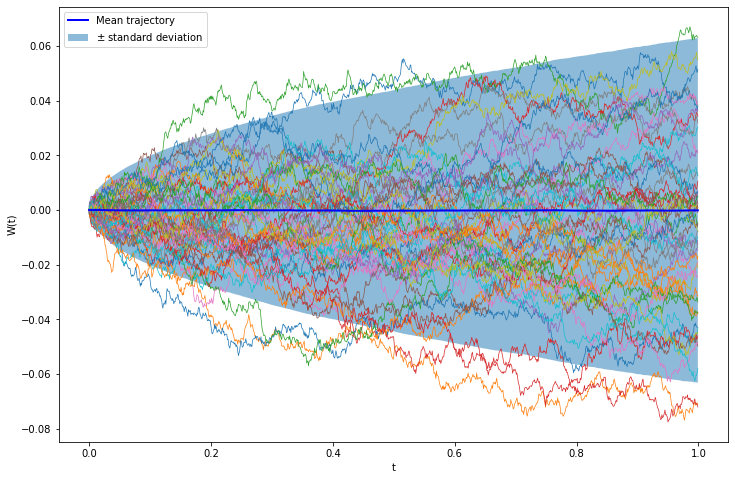

In [98]:
plot_trajectories(W1,ts)

In [106]:
from scipy.stats import norm

def plot_histogram(trajectories,ts,t = 0.7):

    
    col = np.where(np.abs(ts - t) < 1e-6)[0][0]
    values = trajectories[:,col]
    mu = 0
    sigma = np.sqrt(t)
    x = np.linspace(mu - 3*sigma,mu + 3*sigma,1000)
    
    
    fig = plt.figure(figsize=(12, 8))
    plt.hist(values, density = True)
    plt.plot(x, norm.pdf(x,mu,sigma**2))
    plt.show()
    

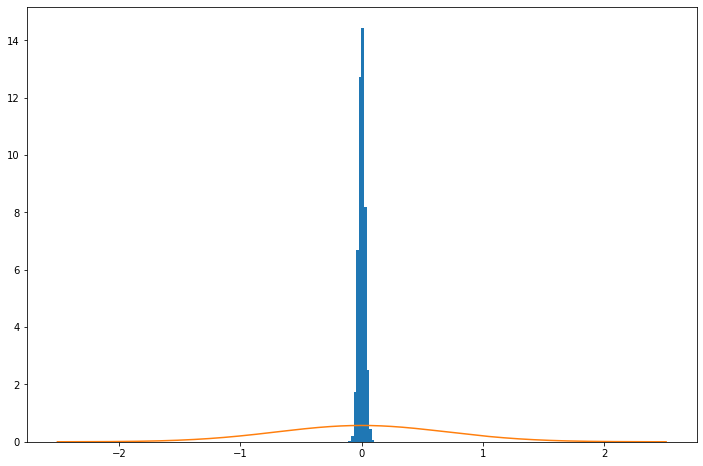

In [107]:
plot_histogram(W1,ts)